In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew,kurtosis
from sklearn.preprocessing import PowerTransformer, StandardScaler
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data_to_Transform.csv')
data.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296


In [3]:
data.shape

(10000, 4)

In [4]:
def histo_qq(sample, name):
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
    fig.suptitle(name)
    sns.histplot(sample, ax=axes[0] )
    axes[0].set_title(f"{name} distribution")
    sm.qqplot(sample, ax=axes[1], line = '45')
    axes[1].set_title(f"{name} qq plot")

In [5]:
def hip_normal(sample, name):
    shapiro_test = stats.shapiro(sample)
    if shapiro_test.pvalue > 0.05:
        return f"{name}: {shapiro_test.pvalue} - distribution is normal"
    else:
        return f"{name}: {shapiro_test.pvalue} - distribution is not normal"

Moderate Positive Skew: 8.190698825258773e-38 - distribution is not normal
Highly Positive Skew: 0.0 - distribution is not normal
Moderate Negative Skew: 1.2663074596207073e-38 - distribution is not normal
Highly Negative Skew: 0.0 - distribution is not normal


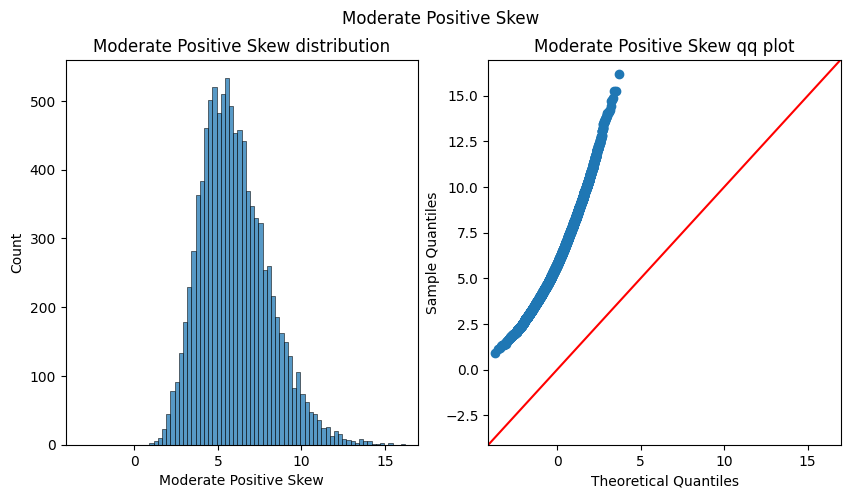

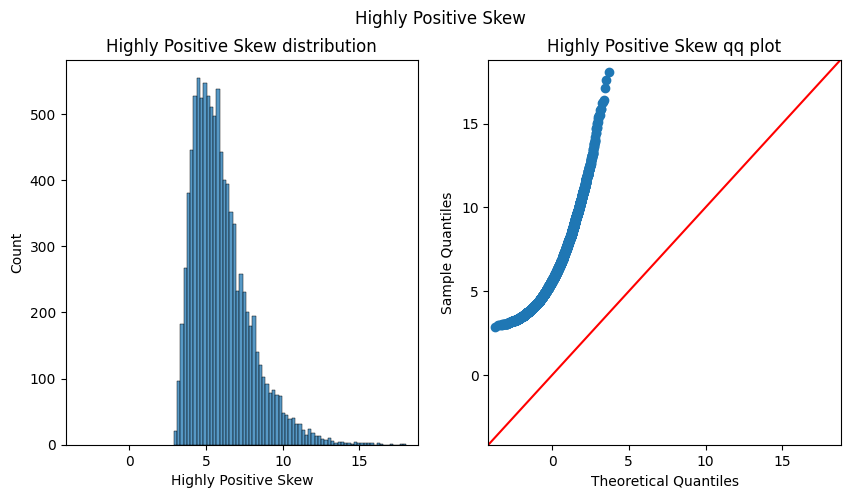

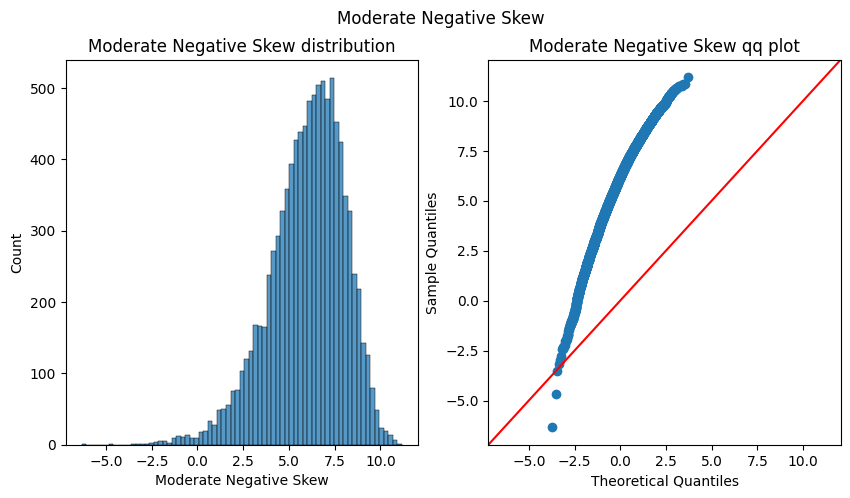

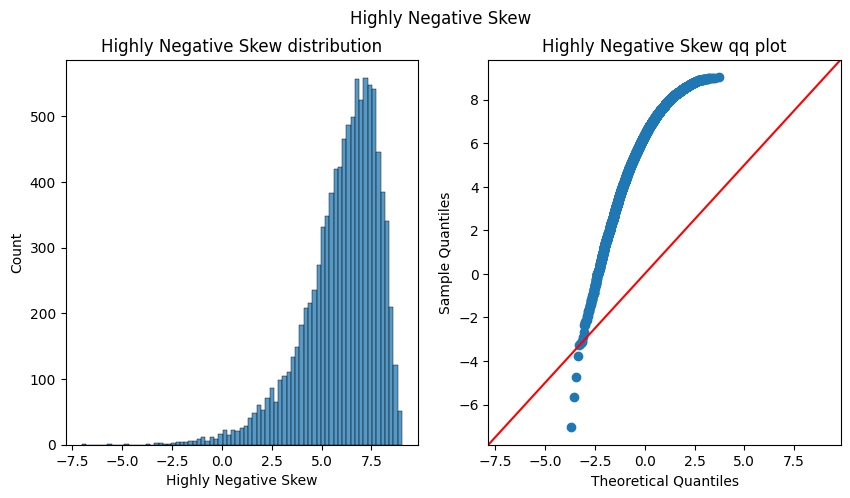

In [6]:
for column in data.columns:
    print(hip_normal(data[column], column))
    histo_qq(data[column], column)

- Асиметрія = 0: розподілено нормально.
- Асиметрія > 0: більша вага в лівому хвості розподілу.
- Асиметрія < 0: більша вага в правому хвості розподілу.
- ексцес для нормального розподілу дорівнює 3.
- Для розподілу з ексцесом < 3: це називається playkurtic.(тонші хвости)
- Для розподілу, який має ексцес > 3, він називається лептокуртичним і означає, що він намагається створити більше викидів, а не нормальний розподіл.

In [7]:
for column in data.columns:
    print(f"{column} skew {skew(data[column], axis=0, bias=True)}")
    print(f"{column} kurtosis {kurtosis(data[column], axis=0, bias=True)}")

Moderate Positive Skew skew 0.6562098249288331
Moderate Positive Skew kurtosis 0.583228154341418
Highly Positive Skew skew 1.2710586687587704
Highly Positive Skew kurtosis 2.404196661462528
Moderate Negative Skew skew -0.6901407646903879
Moderate Negative Skew kurtosis 0.7895386802834019
Highly Negative Skew skew -1.2017111161843201
Highly Negative Skew kurtosis 2.0852192801010743


In [8]:
def box_cox(sample, name):
    try:
        data = sample.values.reshape(-1, 1)
        data_new = PowerTransformer(method = 'box-cox').fit_transform(data) 
        return data_new.flatten()
    except TypeError:
        print(f"only postive data") 

In [9]:
new_data = {}
for column in data.columns:
    try: 
        new_data[column] = box_cox(data[column], column)
    except:
        print(f"{column} has a negative and 0 values")

Moderate Negative Skew has a negative and 0 values
Highly Negative Skew has a negative and 0 values


In [10]:
def tranform_for_box_cox(sample):
    array = sample.values
    min_value = min(array) * (-1)
    shift_values = array + min_value + 0.1
    return shift_values

In [11]:
tranform_moderate = tranform_for_box_cox(data['Moderate Negative Skew'])

In [12]:
tranform_highly = tranform_for_box_cox(data['Highly Negative Skew'])

In [13]:
def box_cox_transform(sample, name):
    data = sample.reshape(-1, 1)
    data_new = PowerTransformer(method = 'box-cox').fit_transform(data)
    new_data[name] = data_new.flatten()
    return data_new

In [14]:
tranform_moderate_normal = box_cox_transform(tranform_moderate, 'Moderate Negative Skew')

In [15]:
tranform_moderate_normal = box_cox_transform(tranform_highly, 'Highly Negative Skew')

In [16]:
new_data

{'Moderate Positive Skew': array([-3.93514665, -3.60419748, -3.54226147, ...,  3.34867158,
         3.35077413,  3.59529163]),
 'Highly Positive Skew': array([-2.79895941, -2.68456016, -2.6778994 , ...,  2.96624194,
         3.02494107,  3.07037366]),
 'Moderate Negative Skew': array([ 3.25422873,  2.99272012,  2.97360446, ..., -2.90157337,
        -2.98323449, -3.02216663]),
 'Highly Negative Skew': array([ 2.26752791,  2.24930438,  2.24558018, ..., -2.47860643,
        -2.48367479, -2.48473599])}

In [19]:
data_normal = pd.DataFrame(data = new_data)
data_normal.head()

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,-3.935147,-2.798959,3.254229,2.267528
1,-3.604197,-2.684560,2.992720,2.249304
2,-3.542261,-2.677899,2.973604,2.245580
3,-3.394896,-2.621817,2.932919,2.239416
4,-3.316277,-2.602573,2.924207,2.220139


Moderate Positive Skew: 0.7117946147918701 - distribution is normal
Highly Positive Skew: 3.107444043835145e-14 - distribution is not normal
Moderate Negative Skew: 4.488841298666557e-09 - distribution is not normal
Highly Negative Skew: 1.0397410138686485e-27 - distribution is not normal


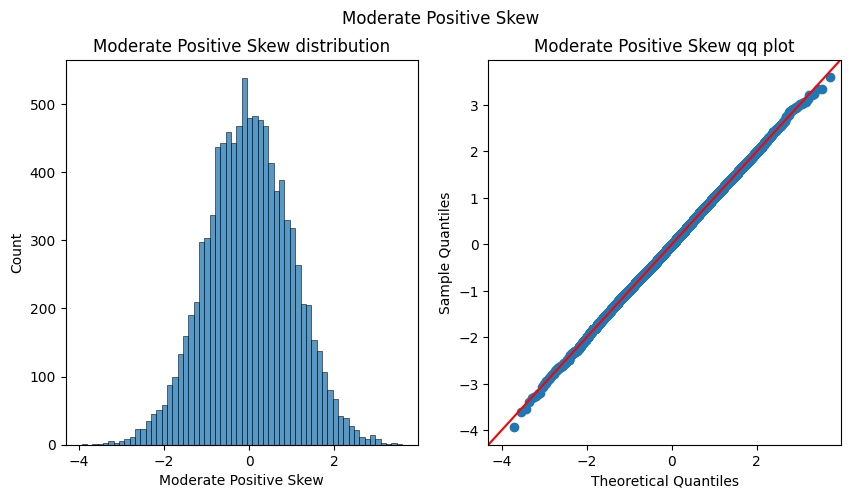

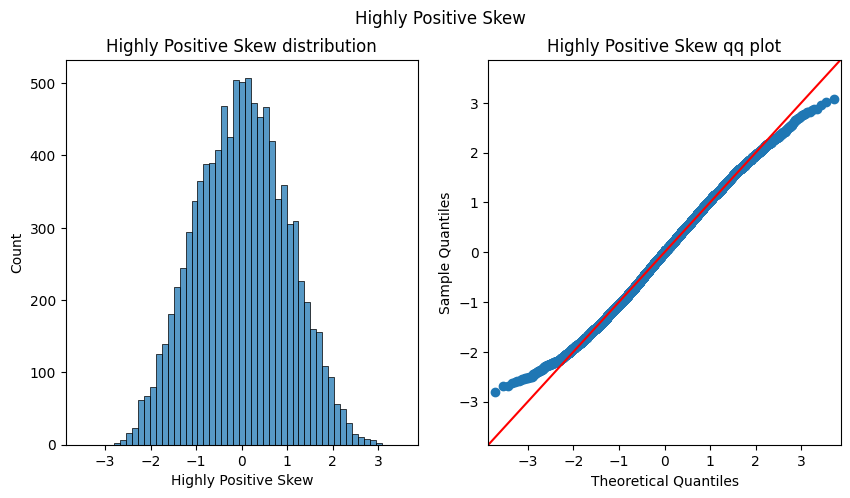

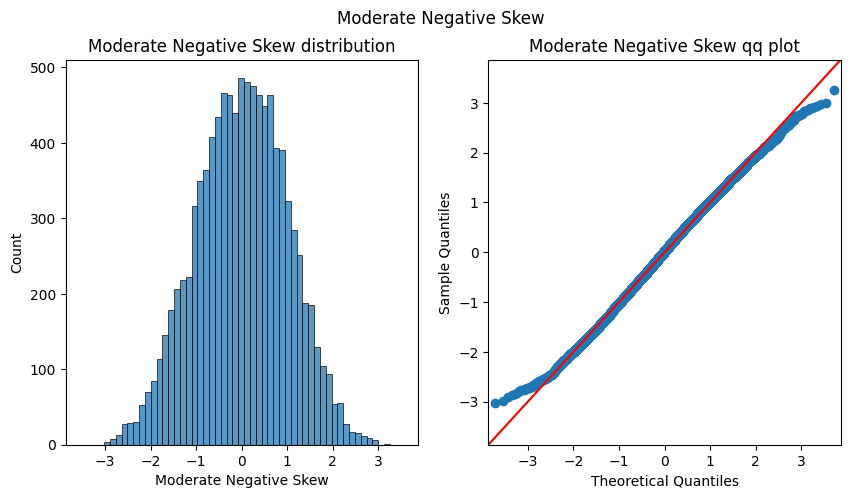

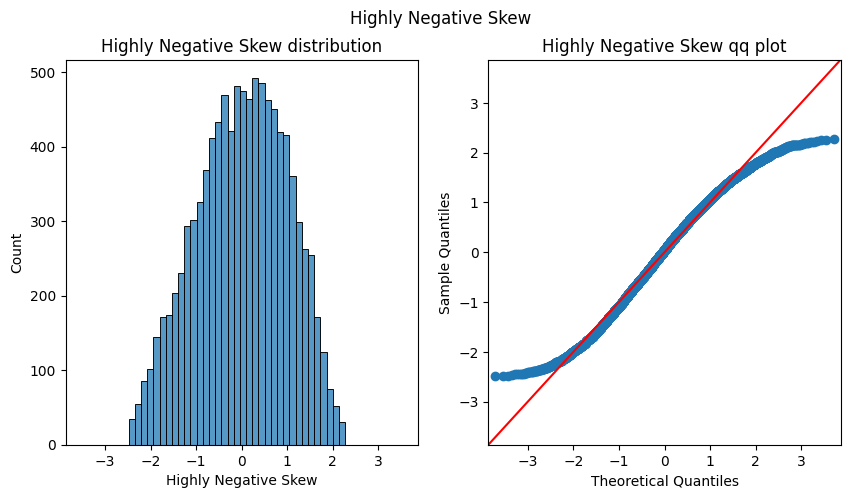

In [20]:
for column in data_normal.columns:
    print(hip_normal(data_normal[column], column))
    histo_qq(data_normal[column], column)